# Homework 5

## Question 2: MNIST dataset

### Import Data and Packages

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import ListedColormap

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


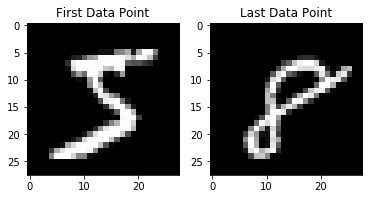

5
8


In [23]:
xtrain = loadmat('mnist_10digits.mat')['xtrain']
train_labels = loadmat('mnist_10digits.mat')['ytrain'].T
xtest = loadmat('mnist_10digits.mat')['xtest']
test_labels = loadmat('mnist_10digits.mat')['ytest'].T
labels = ['1','2','3','4','5','6','7','8','9','10']

print(xtrain.shape) #60,000 examples of 28x28
print(train_labels.shape)
print(xtest.shape) #10,000 examples of 28x28
print(test_labels.shape)

plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(xtrain[0, :].reshape(28, 28), cmap='gray')
plt.title("First Data Point")

plt.subplot(1, 2, 2)
plt.imshow(xtrain[-1, :].reshape(28, 28), cmap='gray')
plt.title("Last Data Point")

plt.show()
ytrain = []
ytest = []
for i in train_labels:
    for x in i:
        ytrain.append(x)
#print(len(ytrain))

for i in test_labels:
    for x in i:
        ytest.append(x)
#print(len(ytest))

print(ytrain[0])
print(ytrain[-1])

### Standardize

In [3]:
xtrain = xtrain/255
xtest = xtest/255

print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


### Downsize for KNN and SVM

In [4]:
new_x, new_x_test, new_y, new_y_test = train_test_split(xtrain, ytrain, train_size=0.083334, random_state= 100)

print(new_x.shape)
print(len(new_y))

(5000, 784)
5000


### KNN

In [48]:
neigh = KNeighborsClassifier(30)
d_knn = neigh.fit(new_x, new_y)

In [49]:
print("KNN Accuracy Score:")
print(d_knn.score(new_x_test, new_y_test))
knn_pred = neigh.predict(new_x_test)

KNN Accuracy Score:
0.9010363636363636


### Logistic Regression

In [5]:
logit = LogisticRegression(max_iter = 3000)
d_log = logit.fit(xtrain, ytrain)
# Prediction
log_pred = logit.predict(xtest)

In [45]:
print("Logistic Accuracy Score:")
print(d_log.score(xtest, ytest))

Logistic Accuracy Score:
0.8644


### SVM

In [50]:
svm_clf = svm.SVC(kernel='linear')
d_svm = svm_clf.fit(new_x, new_y)
svm_pred = svm_clf.predict(new_x_test)

In [51]:
print("SVM Accuracy Score:")
print(d_svm.score(new_x_test, new_y_test))

SVM Accuracy Score:
0.9050181818181818


### Kernel SVM

In [46]:
ksvm_model = svm.SVC(kernel='rbf', gamma = 'scale')
d_ksvm = ksvm_model.fit(new_x, new_y)
ksvm_pred = ksvm_model.predict(new_x_test)

In [47]:
print("Kernel SVM Accuracy Score:")
print(d_ksvm.score(new_x_test, new_y_test))

Kernel SVM Accuracy Score:
0.9513636363636364


### Neural Networks

In [29]:
nn_clf = MLPClassifier(random_state=100, hidden_layer_sizes = (20, 10), max_iter=300)
d_NN = nn_clf.fit(xtrain, ytrain)
nn_pred = nn_clf.predict(xtest)

In [30]:
print("Neural Network Accuracy Score:")
print(d_NN.score(xtest, ytest))

Neural Network Accuracy Score:
0.9457


### Confusion Matrix

In [59]:
def cm(test, pred, title):
    print(title + " Confusion Matrix")
    print(confusion_matrix(test, pred))
    
cm(new_y_test,knn_pred, "K-Nearest Neighbor")
cm(ytest,log_pred, "Logistic Regression")
cm(new_y_test, svm_pred, "SVM")
cm(new_y_test,ksvm_pred, "Kernel SVM")
cm(ytest, nn_pred, "Neural Network")

K-Nearest Neighbor Confusion Matrix
[[5283    9    7    6    4   31   83    8    9   11]
 [   0 6146   10    6    5    1    5   10    2    6]
 [  69  395 4518   43   49   11   37  212   53   37]
 [  17  163   39 5037    8  102   17   89   77   93]
 [   5  176    7    0 4661    0   42   18    2  424]
 [  42  152    2  182   29 4283  101   20   20  152]
 [  70   94    5    1   16   29 5222    3    2    3]
 [   8  232   10    1   38    1    1 5268    0  189]
 [  33  368   21  267   51  171   53   44 4173  176]
 [  37   71   13   71   74   12    5  167    8 4966]]
Logistic Regression Confusion Matrix
[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    

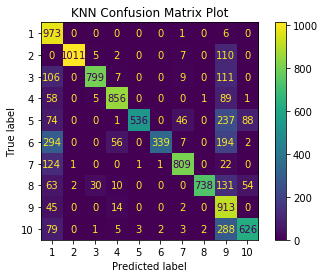

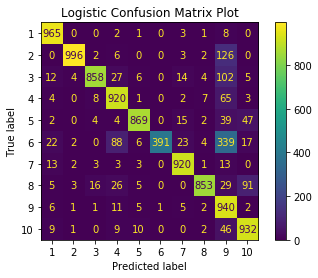

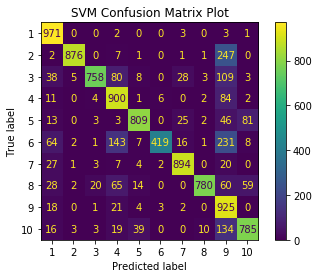

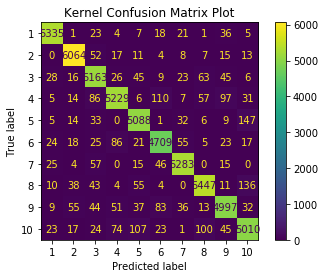

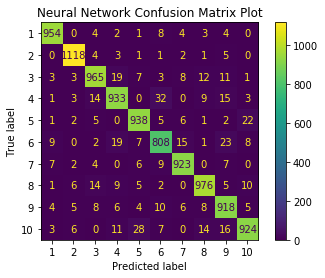

In [58]:
def cm_plot(model, title):
    plot_confusion_matrix(model, xtest, ytest, display_labels = range(1,11), values_format = '.5g')
    plt.title(title + " Confusion Matrix Plot")
    plt.show()
cm_plot(neigh, "KNN")
cm_plot(logit, "Logistic")
cm_plot(svm_clf, "SVM")
cm_plot(ksvm_model, "Kernel SVM")
cm_plot(nn_clf, "Neural Network")

### Precision, Recall, and F-1 Score

In [56]:
def scores(test, pred, model):
    print(model + " Report")
    print(classification_report(test, pred, target_names = labels))
    
scores(new_y_test,knn_pred, "K-Nearest Neighbors")
scores(ytest,log_pred, "Logistic Regression")
scores(new_y_test,svm_pred, "Support Vector Machines")
scores(new_y_test,ksvm_pred, "Kernel SVM")
scores(ytest,nn_pred, "Neural Networks")

K-Nearest Neighbors Report
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      5451
           2       0.79      0.99      0.88      6191
           3       0.98      0.83      0.90      5424
           4       0.90      0.89      0.89      5642
           5       0.94      0.87      0.91      5335
           6       0.92      0.86      0.89      4983
           7       0.94      0.96      0.95      5445
           8       0.90      0.92      0.91      5748
           9       0.96      0.78      0.86      5357
          10       0.82      0.92      0.87      5424

    accuracy                           0.90     55000
   macro avg       0.91      0.90      0.90     55000
weighted avg       0.91      0.90      0.90     55000

Logistic Regression Report
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       980
           2       0.96      0.98      0.97      1135
           3       0.93 